# Step 0:　Importing the requires libraries

In [1]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#### The goal of this project is to predict whether individual's income exceeds $50K/yr based on census data.   
This project's framework includes following steps:  
1.Data PreProcessing  
2.Establishing Decision Tree Classification Model  
3.Visualizing the decision tree model and analyzing the model result

# Step 1:　Data PreProcessing

## 1-1 Impord the data file

In [360]:
df = pd.read_csv('adult_data1001.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 1-2 Understanding the data

In [361]:
print('df shape:', df.shape)
print('df size:', df.size)
print('df.ndim:', df.ndim, '\n')
print('df.index:', df.index)
print('df.columns:', df.columns)

df shape: (32561, 15)
df size: 488415
df.ndim: 2 

df.index: RangeIndex(start=0, stop=32561, step=1)
df.columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [363]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [364]:
# Total number of records
records_number = len(df)
#Number of records where individual's income is more than $50,000
greater_50k = len(df.query('income == " >50K"'))
#Number of records where individual's income is at most $50,000
atmost_50k = len(df.query('income == " <=50K"'))
#Percentage of individuals's income exceeds $50,000
greater_50k_percent = (float(greater_50k) / records_number * 100)

print("Total number of records: {}".format(records_number))
print("individuals's income exceeds $50,000: {}".format(greater_50k))
print("individuals's income is at most $50,000: {}".format(atmost_50k))
print("Percentage of individuals's income exceeds $50,000: {:.2f}%".format(greater_50k_percent))

Total number of records: 32561
individuals's income exceeds $50,000: 7841
individuals's income is at most $50,000: 24720
Percentage of individuals's income exceeds $50,000: 24.08%


### Understanding every feature

#### 工薪階層Workclass

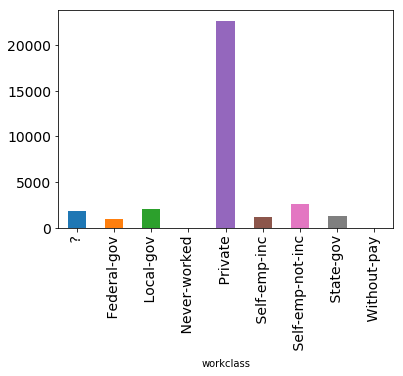

In [365]:
df.groupby(["workclass"]).size().plot(kind="bar",fontsize=14)

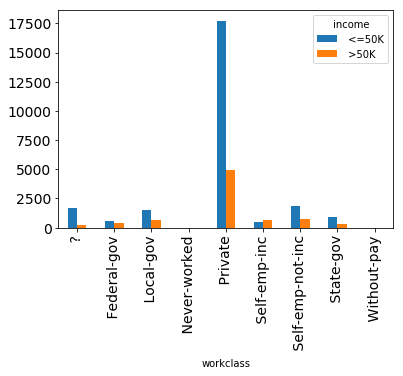

In [366]:
df.groupby(["income","workclass"]).size().unstack("income").plot(kind="bar",fontsize=14)

#### 教育education

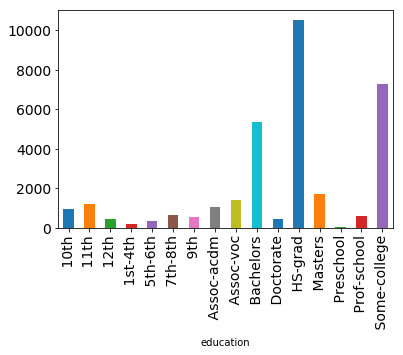

In [367]:
df.groupby(["education"]).size().plot(kind="bar",fontsize=14)

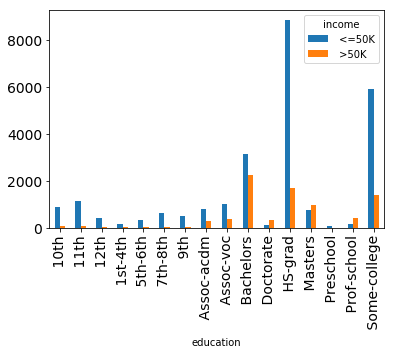

In [368]:
df.groupby(["income","education"]).size().unstack("income").plot(kind="bar",fontsize=14)

#### 婚姻狀態marital-status

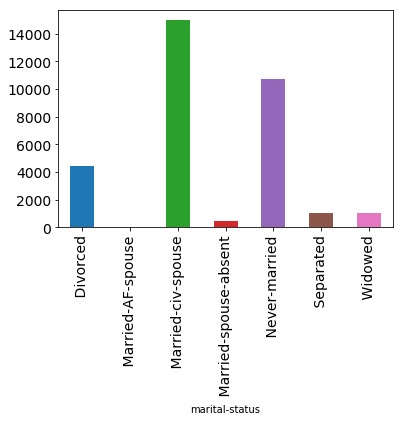

In [369]:
df.groupby(["marital-status"]).size().plot(kind="bar",fontsize=14)

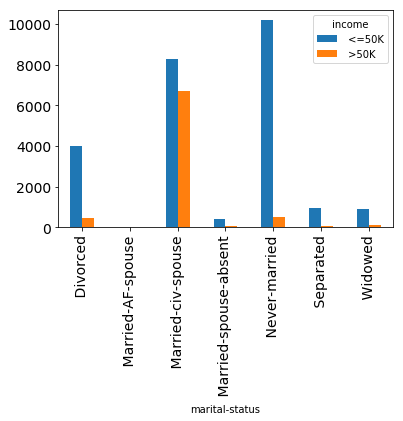

In [370]:
df.groupby(["income","marital-status"]).size().unstack("income").plot(kind="bar",fontsize=14)

#### 職業occupation

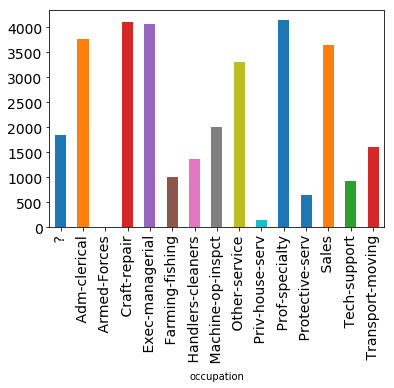

In [371]:
df.groupby(["occupation"]).size().plot(kind="bar",fontsize=14,x=df.groupby(["occupation"]).size(),y=df[["occupation"]])

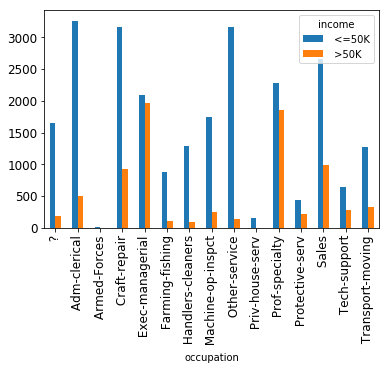

In [372]:
df.groupby(["income","occupation"]).size().unstack("income").plot(kind="bar",fontsize=12)

#### 家庭角色relationship

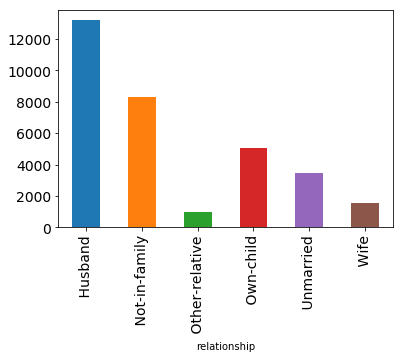

In [373]:
df.groupby(["relationship"]).size().plot(kind="bar",fontsize=14)

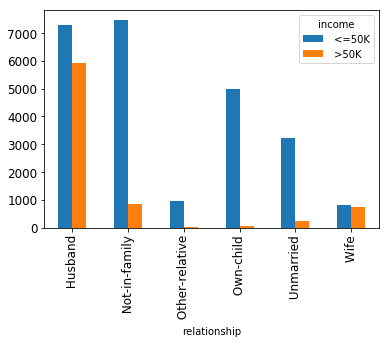

In [374]:
df.groupby(["income","relationship"]).size().unstack("income").plot(kind="bar",fontsize=12)

#### 種族race

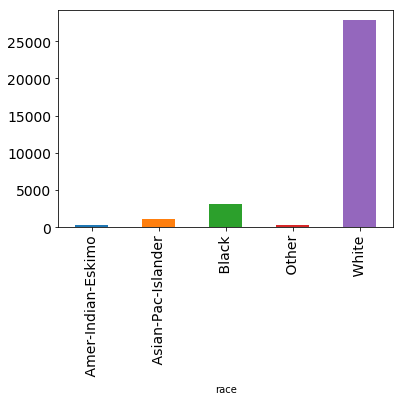

In [375]:
df.groupby(["race"]).size().plot(kind="bar",fontsize=14)

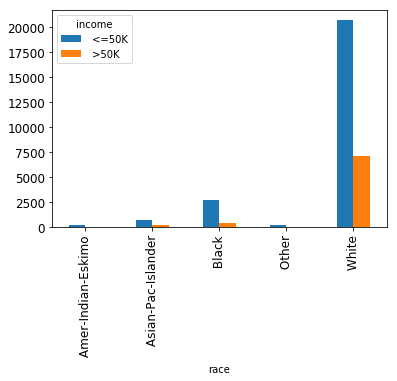

In [376]:
df.groupby(["income","race"]).size().unstack("income").plot(kind="bar",fontsize=12)

#### 原生國家native-country

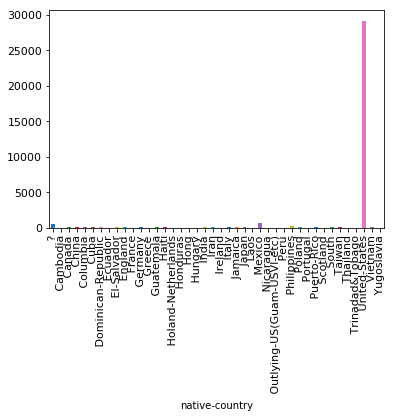

In [377]:
df.groupby(["native-country"]).size().plot(kind="bar",fontsize=11)

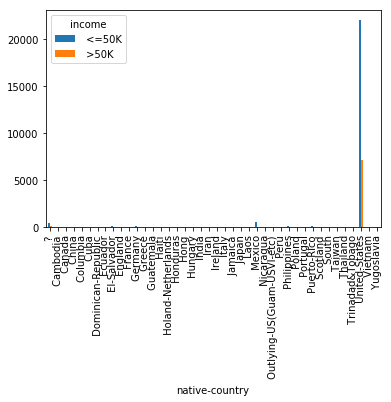

In [378]:
df.groupby(["income","native-country"]).size().unstack("income").plot(kind="bar")

#### 性別sex

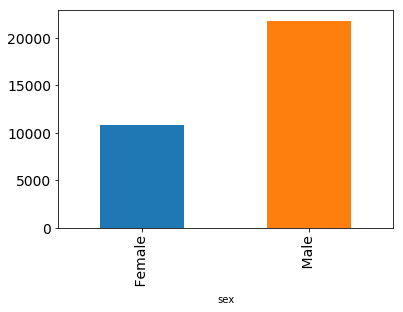

In [379]:
df.groupby(["sex"]).size().plot(kind="bar",fontsize=14)

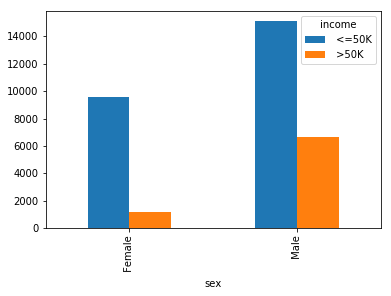

In [380]:
df.groupby(["income","sex"]).size().unstack("income").plot(kind="bar")

In [381]:
df.pivot_table(df, index=['income'], aggfunc=np.mean)

,age,capital-gain,capital-loss,education-num,fnlwgt,hours-per-week
income,,,,,,
<=50K,36.783738,148.752468,53.142921,9.595065,190340.86517,38.840210
>50K,44.249841,4006.142456,195.001530,11.611657,188005.00000,45.473026


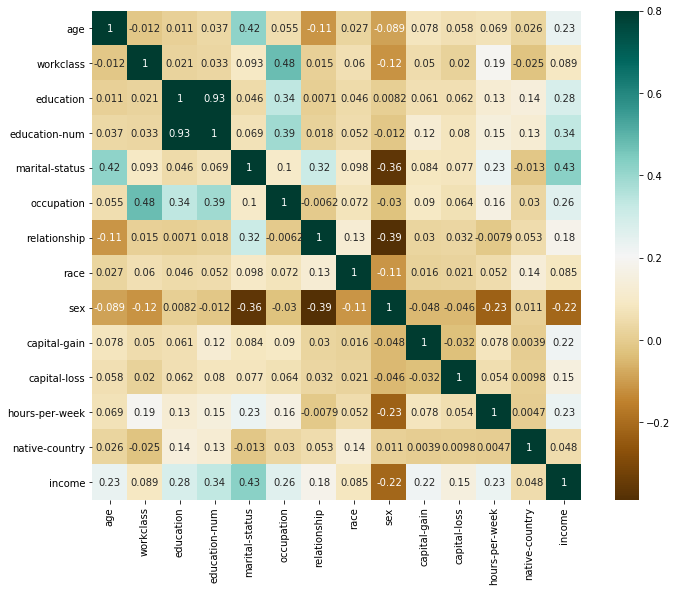

In [432]:
hmap = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True)

## 1-2 Drop the useless feature

### delete fnlwgt feature which is useless for  predicting the income whether excees 50k

In [382]:
df=df.drop(columns='fnlwgt')#drops column:fnlwgt

## 1-3 Handling the missing data

#### ? number

In [383]:
def questionmark_number(x):
    return sum(x==' ?')
df.apply(questionmark_number)

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

## 1-4 Encoding Categorical Data

####  Categorical variables: [workclass:1,education:2, marital-status:4, occupation:5, relationship:6, race:7,  sex:8, native-country:12]

In [384]:
print('1.workclass:',set(df['workclass']) )

1.workclass: {' Local-gov', ' Federal-gov', ' ?', ' Without-pay', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov'}


工作類型: 0. Without-pay（無收入）1. Local-gov（地方政府）,2. State-gov（州政府）,3. Federal-gov（聯邦政府）, 
  4.Private（私人企業） 5. Self-emp-not-inc（非有限責任公司自由職業）,  6. Self-emp-inc（有限責任公司自由職業),,

In [385]:
df['workclass'] = df['workclass'].map({' ?':-1, ' Without-pay':0,' Never-worked':1, ' Local-gov':2,' State-gov':3, ' Federal-gov':3,
                                      ' Private':4, ' Self-emp-not-inc':5, ' Self-emp-inc':6})

In [388]:
print('2.education:',set(df['education']))

2.education: {' Assoc-voc', ' 12th', ' Bachelors', ' Assoc-acdm', ' 5th-6th', ' Doctorate', ' Some-college', ' HS-grad', ' Masters', ' 7th-8th', ' Preschool', ' 9th', ' 1st-4th', ' 10th', ' Prof-school', ' 11th'}


0.Preschool（幼兒園）1. 1st-4th（小學1-4年級）, 2. 5th-6th（小學5、6年級） 3. 7th-8th（初中一、二年級）, 4. 9th（初三）, 5. 10th（高一）, 6. 11th（高二）,7. 12th（高三）, 8. Prof-school（職業學校）, 9. HS-grad（高中畢業）, 10. Some-college（大學未畢業） , 11. Assoc-voc（準職業學位）,12. Assoc-acdm（大學專科）, 13. Bachelors（學士）, 14. Masters（碩士）, 15. Doctorate （博士）

In [389]:
df['education'] = df['education'].map({' Preschool':0,' 1st-4th':1,' 5th-6th':2, ' 7th-8th':3,
                                      ' 9th':4, ' 10th':5, ' 11th':6, ' 12th':7, ' Prof-school':8, 
                                      ' HS-grad':9, ' Some-college':10, ' Assoc-voc':11, ' Assoc-acdm':12,
                                       ' Bachelors':13, ' Masters':14, ' Doctorate':15})

In [390]:
print('3.marital-status:',set(df['marital-status']))

3.marital-status: {' Never-married', ' Married-spouse-absent', ' Separated', ' Divorced', ' Widowed', ' Married-AF-spouse', ' Married-civ-spouse'}


0 Never-married（未婚）,1 Widowed（喪偶）,2 Divorced（離婚）,3 Separated（分居）,4 Married-spouse-absent（已婚配偶異地）,
5 Married-civ-spouse（已婚平民配偶）,6 Married-AF-spouse（已婚軍屬）

In [391]:
df['marital-status'] = df['marital-status'].map({' Never-married':0,' Widowed':1,' Divorced':2, ' Separated':3,
                                      ' Married-spouse-absent':4, ' Married-civ-spouse':5, ' Married-AF-spouse':6})

In [392]:
print('4.occupation:',set(df['occupation']))

4.occupation: {' Protective-serv', ' Exec-managerial', ' Other-service', ' Handlers-cleaners', ' Adm-clerical', ' ?', ' Tech-support', ' Transport-moving', ' Craft-repair', ' Priv-house-serv', ' Machine-op-inspct', ' Prof-specialty', ' Armed-Forces', ' Farming-fishing', ' Sales'}


0. Priv-house-serv（家政服務）,1. Protective- serv（保安）,2. Handlers-cleaners （勞工保洁）, 3. Machine-op-inspct（機械操作）,
4. Adm-clerical（管理文書）,5. Farming-fishing（農業捕撈）, 6. Transport-moving（運輸）, 7. Craft-repair（手工藝維修）,
8. Other-service（其他職業）,  9. Tech-support（技術支持）,10. Sales（銷售）, 11. Exec-managerial（執行主管）, 
12. Prof-specialty（專業技術）,13.  Armed-Forces（軍人)

In [393]:
df['occupation'] = df['occupation'].map({' ?':-1,' Priv-house-serv':0,' Protective-serv':1,' Handlers-cleaners':2, ' Machine-op-inspct':3,
                                      ' Adm-clerical':4, ' Farming-fishing':5, ' Transport-moving':6, ' Craft-repair':7, ' Other-service':8,
                                       ' Tech-support':9, ' Sales':10, ' Exec-managerial':11, ' Prof-specialty':12, ' Armed-Forces':13 })

In [394]:
print('5.relationship:',set(df['relationship']))

5.relationship: {' Not-in-family', ' Husband', ' Unmarried', ' Other-relative', ' Own-child', ' Wife'}


家庭角色:0 Own-child（孩子）,1 Unmarried（未婚）,2 Other-relative（其他關係）,
3 Not-in-family（離家 4 Wife（妻子）5 Husband（丈夫）, 


In [395]:
df['relationship'] = df['relationship'].map({' Unmarried':0,' Other-relative':1, ' Not-in-family':2,
                                      ' Wife':3, ' Husband':4,' Own-child':5})

In [396]:
print('6.race:',set(df['race']) )

6.race: {' Asian-Pac-Islander', ' White', ' Amer-Indian-Eskimo', ' Other', ' Black'}


種族: 0 Black（非裔）,1 Asian-Pac-Islander（亞裔、太平洋島裔）, 
2 Amer-Indian-E skimo（美洲印第安裔、愛斯基摩裔）,3 Other（其他）,4 White（白人）  

In [397]:
df['race'] = df['race'].map({' Black':0,' Asian-Pac-Islander':1,' Amer-Indian-Eskimo':2, ' Other':3,
                                      ' White':4})

In [398]:
print('7.sex:',set(df['sex']) )

7.sex: {' Male', ' Female'}


In [399]:
df['sex'] = df['sex'].map({' Male':0,' Female':1})

In [400]:
print('8.native-country:',set(df['native-country']) )

8.native-country: {' Jamaica', ' Honduras', ' Germany', ' Japan', ' Holand-Netherlands', ' Ireland', ' Canada', ' Mexico', ' Hungary', ' Haiti', ' Iran', ' ?', ' Laos', ' Greece', ' Nicaragua', ' Scotland', ' Thailand', ' Outlying-US(Guam-USVI-etc)', ' Cuba', ' El-Salvador', ' Guatemala', ' Yugoslavia', ' Ecuador', ' Dominican-Republic', ' Columbia', ' India', ' Philippines', ' Portugal', ' Peru', ' England', ' Taiwan', ' Poland', ' Cambodia', ' United-States', ' France', ' Vietnam', ' Puerto-Rico', ' China', ' Italy', ' Trinadad&Tobago', ' Hong', ' South'}


原國籍: 0 Puerto-Rico（波多黎各）, 1 Haiti（海地）,2 Cuba（古巴）, 3 Iran（伊朗）, 4 Honduras（洪都拉斯）,  
    5 Jamaica（牙買加）, 6 Vietnam（越南）,7 Mexico（墨西哥）
     8 Dominican-Republic（多米尼加共和國）, 9 Laos（寮國） , 10 Ecuador（厄瓜多爾）,  11 El-Salvador（薩爾瓦多）,
        12 Cambodia（柬埔寨）,13 Columbia（哥倫比亞）,  14Guatemala（危地馬拉）, 15 South（南美）,16 India（印度）,
   17 Nicaragua（尼加拉瓜）, 18Yugoslavia（南斯拉夫） , 
    19 Philippines（菲律賓）, 20 Thailand（泰國）,21 Trinadad&Tobago（特立尼達和多巴哥）,  
    22 Peru（秘魯）, 23 Poland（波蘭）,24 China（中國）,25 Hungary（匈牙利）,
  26 Greece（希臘）, 27 Taiwan（台灣）, 28 Italy（意大利）,29 Portugal（葡萄牙） 
30 France（法國）, 31 Hong（港）, 32 England（英國）, 33 Scotland（蘇格蘭）,34 Ireland（愛爾蘭）,
35 Holand-Netherlands（荷蘭）, 36 Canada（加拿大）, 37 Germany（德國）,  
38 Japan（日本）,,39 Outlying-US(Guam-USVI-etc) （美國海外屬地）,40 United-States（美國）

In [401]:
df['native-country'] = df['native-country'].map({' ?':-1,' Puerto-Rico':0,' Haiti':1,' Cuba':2, ' Iran':3,
                                      ' Honduras':4, ' Jamaica':5, ' Vietnam':6, ' Mexico':7, ' Dominican-Republic':8,
                                       ' Laos':9, ' Ecuador':10, ' El-Salvador':11, ' Cambodia':12, ' Columbia':13,
                                         ' Guatemala':14, ' South':15, ' India':16, ' Nicaragua':17, ' Yugoslavia':18, 
                                         ' Philippines':19, ' Thailand':20, ' Trinadad&Tobago':21, ' Peru':22, ' Poland':23, 
                                         ' China':24, ' Hungary':25, ' Greece':26, ' Taiwan':27, ' Italy':28, ' Portugal':29, 
                                         ' France':30, ' Hong':31, ' England':32, ' Scotland':33, ' Ireland':34, 
                                         ' Holand-Netherlands':35, ' Canada':36, ' Germany':37, ' Japan':38, 
                                         ' Outlying-US(Guam-USVI-etc)':39, ' United-States':40
                                        })

In [402]:
print('9.income:',set(df['income']) )

9.income: {' <=50K', ' >50K'}


In [403]:
df['income'] = df['income'].map({' <=50K':0,' >50K':1})

In [404]:
x = df.iloc[ : ,:-1].values.astype(int)
x

array([[39,  3, 13, ...,  0, 40, 40],
       [50,  5, 13, ...,  0, 13, 40],
       [38,  4,  9, ...,  0, 40, 40],
       ...,
       [58,  4,  9, ...,  0, 40, 40],
       [22,  4,  9, ...,  0, 20, 40],
       [52,  6,  9, ...,  0, 40, 40]])

In [405]:
y = df[['income']]

## 1-5 Splitting the datasets into training sets and Test set

將資料集分為訓練集和測試集  
訓練和測試的資料數量比例為8:2  
we import train_test_split method of sklearn.cross_validation library   
to splitting the datasets into training sets and test set

In [406]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [407]:
y_train.groupby(["income"]).size()

income
0    19802
1     6246
dtype: int64

In [408]:
def transet_atmost_50k(x):
    return sum(x==0)
def transet_greater_than_50k(x):
    return sum(x==1)

In [409]:
transet_greater_than_50k_n=float(y_train.apply(transet_greater_than_50k)/y_train.size)

In [410]:
("Tranining set's Percentage of individuals making more than $50,000: ", "{:.2f}%".format(transet_greater_than_50k_n*100))

("Tranining set's Percentage of individuals making more than $50,000: ",
 '23.98%')

# Step 2: Establishing Decision Tree Classification Model

In [411]:
classifier1 = DecisionTreeClassifier()
classifier1.fit(x_train, y_train)
y_predict1_test=classifier1.predict(x_test)
y_predict1_train=classifier1.predict(x_train)

In [412]:
classifier1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [413]:
classifier2 = DecisionTreeClassifier(max_leaf_nodes=8)
classifier2.fit(x_train, y_train)
y_predict2_test=classifier2.predict(x_test)
y_predict2_train=classifier2.predict(x_train)

classifier3 = DecisionTreeClassifier(max_leaf_nodes=16)
classifier3.fit(x_train, y_train)
y_predict3_test=classifier3.predict(x_test)
y_predict3_train=classifier3.predict(x_train)

classifier4 = DecisionTreeClassifier(max_leaf_nodes=32)
classifier4.fit(x_train, y_train)
y_predict4_test=classifier4.predict(x_test)
y_predict4_train=classifier4.predict(x_train)

classifier5 = DecisionTreeClassifier(max_leaf_nodes=64)
classifier5.fit(x_train, y_train)
y_predict5_test=classifier5.predict(x_test)
y_predict5_train=classifier5.predict(x_train)

classifier6 = DecisionTreeClassifier(max_leaf_nodes=128)
classifier6.fit(x_train, y_train)
y_predict6_test=classifier6.predict(x_test)
y_predict6_train=classifier6.predict(x_train)

In [414]:
classifier7 = DecisionTreeClassifier(min_impurity_decrease=0.001)
classifier7.fit(x_train, y_train)
y_predict7_test=classifier7.predict(x_test)
y_predict7_train=classifier7.predict(x_train)

classifier8 = DecisionTreeClassifier(min_impurity_decrease=0.01)
classifier8.fit(x_train, y_train)
y_predict8_test=classifier8.predict(x_test)
y_predict8_train=classifier8.predict(x_train)

classifier9 = DecisionTreeClassifier(min_impurity_decrease=0.02)
classifier9.fit(x_train, y_train)
y_predict9_test=classifier9.predict(x_test)
y_predict9_train=classifier9.predict(x_train)

classifier10 = DecisionTreeClassifier(min_impurity_decrease=0.03)
classifier10.fit(x_train, y_train)
y_predict10_test=classifier10.predict(x_test)
y_predict10_train=classifier10.predict(x_train)

classifier11 = DecisionTreeClassifier(min_impurity_decrease=0.04)
classifier11.fit(x_train, y_train)
y_predict11_test=classifier11.predict(x_test)
y_predict11_train=classifier11.predict(x_train)

In [415]:
classifier12 = DecisionTreeClassifier(min_samples_leaf=40, min_samples_split=80)
classifier12.fit(x_train, y_train)
y_predict12_test=classifier12.predict(x_test)
y_predict12_train=classifier12.predict(x_train)

classifier13 = DecisionTreeClassifier(min_samples_leaf=80, min_samples_split=160)
classifier13.fit(x_train, y_train)
y_predict13_test=classifier13.predict(x_test)
y_predict13_train=classifier13.predict(x_train)

classifier14 = DecisionTreeClassifier(min_samples_leaf=160, min_samples_split=320)
classifier14.fit(x_train, y_train)
y_predict14_test=classifier14.predict(x_test)
y_predict14_train=classifier14.predict(x_train)

classifier15 = DecisionTreeClassifier(min_samples_leaf=320, min_samples_split=640)
classifier15.fit(x_train, y_train)
y_predict15_test=classifier15.predict(x_test)
y_predict15_train=classifier15.predict(x_train)

classifier16 = DecisionTreeClassifier(min_samples_leaf=640, min_samples_split=1280)
classifier16.fit(x_train, y_train)
y_predict16_test=classifier16.predict(x_test)
y_predict16_train=classifier16.predict(x_train)

In [416]:
classifier17 = DecisionTreeClassifier(max_leaf_nodes=16,min_impurity_decrease=0.01)
classifier17.fit(x_train, y_train)
y_predict17_test=classifier17.predict(x_test)
y_predict17_train=classifier17.predict(x_train)

classifier18 = DecisionTreeClassifier(max_leaf_nodes=16,min_impurity_decrease=0.02)
classifier18.fit(x_train, y_train)
y_predict18_test=classifier18.predict(x_test)
y_predict18_train=classifier18.predict(x_train)

classifier19 = DecisionTreeClassifier(max_leaf_nodes=16,min_impurity_decrease=0.001)
classifier19.fit(x_train, y_train)
y_predict19_test=classifier19.predict(x_test)
y_predict19_train=classifier19.predict(x_train)

In [417]:
classifier20 = DecisionTreeClassifier(max_leaf_nodes=16,min_samples_leaf=40, min_samples_split=80)
classifier20.fit(x_train, y_train)
y_predict20_test=classifier20.predict(x_test)
y_predict20_train=classifier20.predict(x_train)

classifier21 = DecisionTreeClassifier(max_leaf_nodes=16,min_samples_leaf=80, min_samples_split=160)
classifier21.fit(x_train, y_train)
y_predict21_test=classifier21.predict(x_test)
y_predict21_train=classifier21.predict(x_train)

classifier22 = DecisionTreeClassifier(max_leaf_nodes=16,min_samples_leaf=160, min_samples_split=320)
classifier22.fit(x_train, y_train)
y_predict22_test=classifier22.predict(x_test)
y_predict22_train=classifier22.predict(x_train)

## Step 3: Evaluating the model

### Compare the accuracy of models haiving different parameters

In [418]:
print("Classifier1(default) Accuracy:", '%f'%classifier1.score(x_test, y_test))
print("Classifier2(max_leaf_nodes=8) Accuracy:", '%f'%classifier2.score(x_test, y_test))
print("Classifier3(max_leaf_nodes=16) Accuracy:", '%f'%classifier3.score(x_test, y_test))
print("Classifier4(max_leaf_nodes=32) Accuracy:", '%f'%classifier4.score(x_test, y_test))
print("Classifier5(max_leaf_nodes=64) Accuracy:", '%f'%classifier5.score(x_test, y_test))
print("Classifier6(max_leaf_nodes=128) Accuracy:", '%f'%classifier6.score(x_test, y_test))
print("Classifier7(min_impurity_decrease=0.001) Accuracy:", '%f'%classifier7.score(x_test, y_test))
print("Classifier8(min_impurity_decrease=0.01) Accuracy:", '%f'%classifier8.score(x_test, y_test))
print("Classifier9(min_impurity_decrease=0.02) Accuracy:", '%f'%classifier9.score(x_test, y_test))
print("Classifier10(min_impurity_decrease=0.03) Accuracy:", '%f'%classifier10.score(x_test, y_test))
print("Classifier11(min_impurity_decrease=0.04) Accuracy:", '%f'%classifier11.score(x_test, y_test))
print("Classifier12(min_samples_leaf=40, min_samples_split=80) Accuracy:", '%f'%classifier12.score(x_test, y_test))
print("Classifier13(min_samples_leaf=80, min_samples_split=160) Accuracy:", '%f'%classifier13.score(x_test, y_test))
print("Classifier14(min_samples_leaf=160, min_samples_split=320) Accuracy:", '%f'%classifier14.score(x_test, y_test))
print("Classifier15(min_samples_leaf=320, min_samples_split=640) Accuracy:", '%f'%classifier15.score(x_test, y_test))
print("Classifier16(min_samples_leaf=640, min_samples_split=1280) Accuracy:", '%f'%classifier16.score(x_test, y_test))
print("Classifier17(max_leaf_nodes=16,min_impurity_decrease=0.001) Accuracy:", '%f'%classifier17.score(x_test, y_test))
print("Classifier18(max_leaf_nodes=16,min_impurity_decrease=0.01) Accuracy:", '%f'%classifier18.score(x_test, y_test))
print("Classifier19(max_leaf_nodes=16,min_impurity_decrease=0.02) Accuracy:", '%f'%classifier19.score(x_test, y_test))
print("Classifier20(max_leaf_nodes=16,min_samples_leaf=40, min_samples_split=80) Accuracy:", '%f'%classifier20.score(x_test, y_test))
print("Classifier21(max_leaf_nodes=16,min_samples_leaf=80, min_samples_split=160) Accuracy:", '%f'%classifier21.score(x_test, y_test))
print("Classifier22(max_leaf_nodes=16,min_samples_leaf=160, min_samples_split=320) Accuracy:", '%f'%classifier22.score(x_test, y_test))


Classifier1(default) Accuracy: 0.816521
Classifier2(max_leaf_nodes=8) Accuracy: 0.839091
Classifier3(max_leaf_nodes=16) Accuracy: 0.846922
Classifier4(max_leaf_nodes=32) Accuracy: 0.855827
Classifier5(max_leaf_nodes=64) Accuracy: 0.855213
Classifier6(max_leaf_nodes=128) Accuracy: 0.854445
Classifier7(min_impurity_decrease=0.001) Accuracy: 0.849378
Classifier8(min_impurity_decrease=0.01) Accuracy: 0.839091
Classifier9(min_impurity_decrease=0.02) Accuracy: 0.814218
Classifier10(min_impurity_decrease=0.03) Accuracy: 0.755105
Classifier11(min_impurity_decrease=0.04) Accuracy: 0.755105
Classifier12(min_samples_leaf=40, min_samples_split=80) Accuracy: 0.855213
Classifier13(min_samples_leaf=80, min_samples_split=160) Accuracy: 0.850760
Classifier14(min_samples_leaf=160, min_samples_split=320) Accuracy: 0.848764
Classifier15(min_samples_leaf=320, min_samples_split=640) Accuracy: 0.846614
Classifier16(min_samples_leaf=640, min_samples_split=1280) Accuracy: 0.830339
Classifier17(max_leaf_nodes=1

#### Classifier4 whose max_leaf_nodes  is set to 32 has the highest accuracy 0.855827

### Confusion matrix

In [426]:
print(" Classifier 4 confusion matrix:",'\n',confusion_matrix(y_test, y_predict4_test))  

 Classifier 4 confusion matrix: 
 [[4665  253]
 [ 686  909]]


### Model evaluation index

In [427]:
print("Classifier 4 model evaluation index：\n", classification_report(y_predict4_test, y_test, target_names=["at_most_50K","greater_than_50K"]))

Classifier 4 model evaluation index：
                   precision    recall  f1-score   support

     at_most_50K       0.95      0.87      0.91      5351
greater_than_50K       0.57      0.78      0.66      1162

     avg / total       0.88      0.86      0.86      6513



## Step 3: Visualizing the decision tree model and analyzing the model result

In [421]:
from sklearn.tree import export_graphviz
import pydotplus

### Choosing the classifier 3 whose max_leaf_nodes is set to 16 having fewer branches than classifier 4, it can be easier for visualizing the model  result and  analyzing the result.  In addition, its model accuracy is 0.846922 close to classifier 4 which is the best classifier among the 22 classifiers.

In [422]:
dot_data1 = export_graphviz(classifier3
                           ,out_file=None
                           ,feature_names=['age','workclass','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain', 'capital-loss','hours-per-week','native-country']
                           ,class_names=['at_most_50K','greater_than_50K']
                           ,filled=True
                           ,rounded=True
                           ,special_characters=True)
graph1 = pydotplus.graph_from_dot_data(dot_data1)

In [423]:
graph1.write_jpg("1031_tree_max_leaf_node_16keepna.jpg")

True

In [424]:
from IPython.display import Image

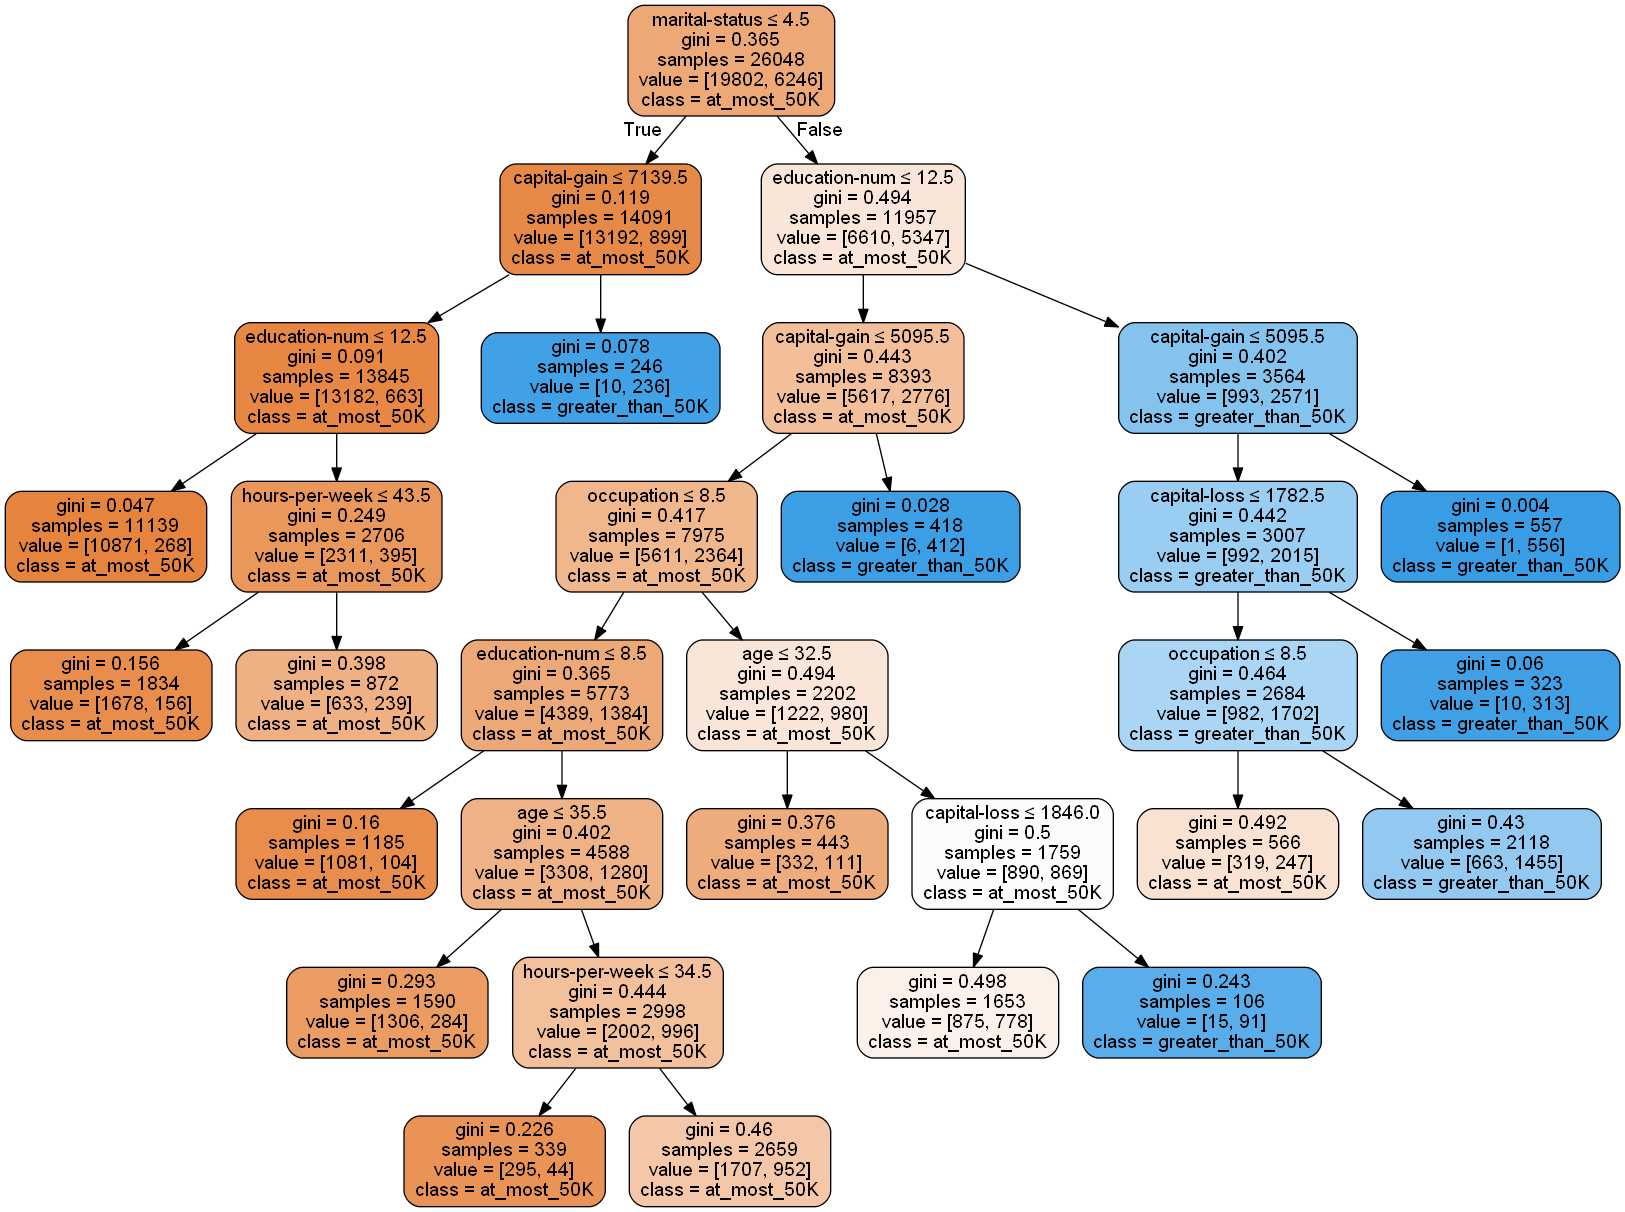

In [425]:
Image(graph1.create_png())

## Conclusion

###  This decison tree visualization image shows that marial status, education num, capital gain, capital loss and occupation will affect whether people make more than 50k per year.  
###    When people's marial status is Married-civ-spouse or Married -AF-spouse, when people's education number is high  and when people get more capital gain and more capital loss, then people will have higher possibility that he or she will make more more than 50k per year.